In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
file='/nfs2/baos1/rudravg/metrics_version2.csv'
data=pd.read_csv(file)

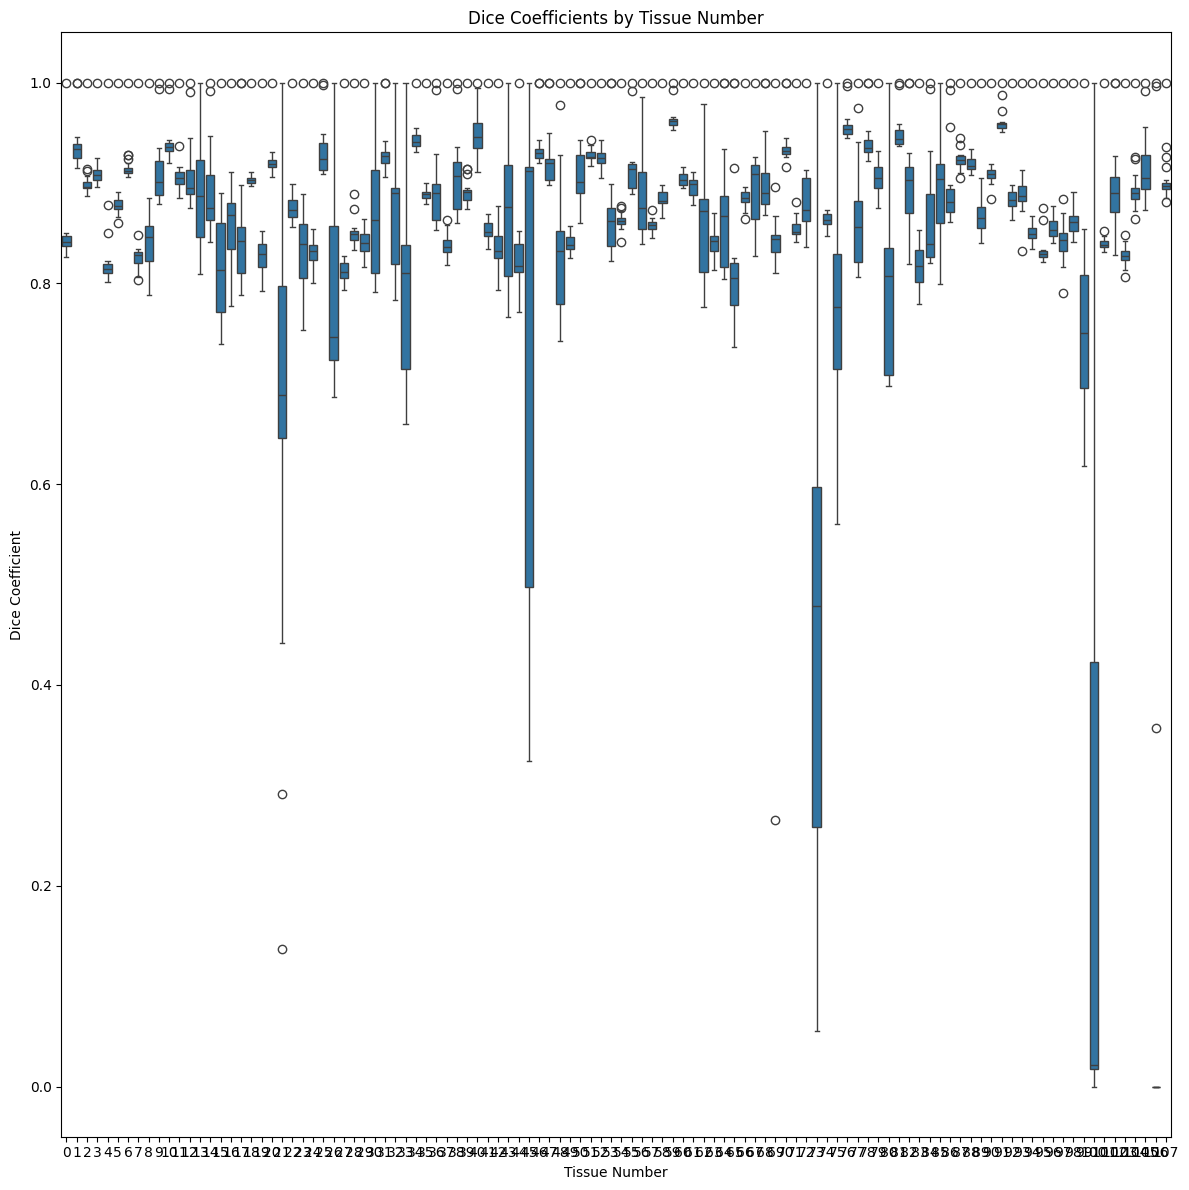

In [10]:
# Modified code to plot all tissues' Dice coefficients in one plot, labeling them with numbers instead of tissue names



# Reset the tissue_dice dictionary to start fresh

tissue_dice = {}

tissue_count = 0  # To keep track of tissue numbers

current_tissue = None



# Iterate over the DataFrame to group dice values by tissue, identified by transitions from one ROUND_00 to the next

for index, row in data.iterrows():

    file_name = row['file_name']

    if 'ROUND_00' in file_name:

        if current_tissue is not None and file_name != current_tissue:

            # Start a new tissue group when a new ROUND_00 is encountered

            tissue_count += 1

        current_tissue = file_name

        # Use tissue_count as the key instead of the file name

        if tissue_count not in tissue_dice:

            tissue_dice[tissue_count] = []

    if current_tissue:

        # Append dice values to the current tissue group

        tissue_dice[tissue_count].append(row['dice'])



# Convert the dictionary to a DataFrame for easier plotting

tissue_dice_df = pd.DataFrame([(k, v) for k, vals in tissue_dice.items() for v in vals], columns=['Tissue_Number', 'Dice'])





/tmp/ipykernel_1927010/118346133.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Tissue_Number', y='Dice', data=tissue_dice_df, ax=ax, palette="Set3")


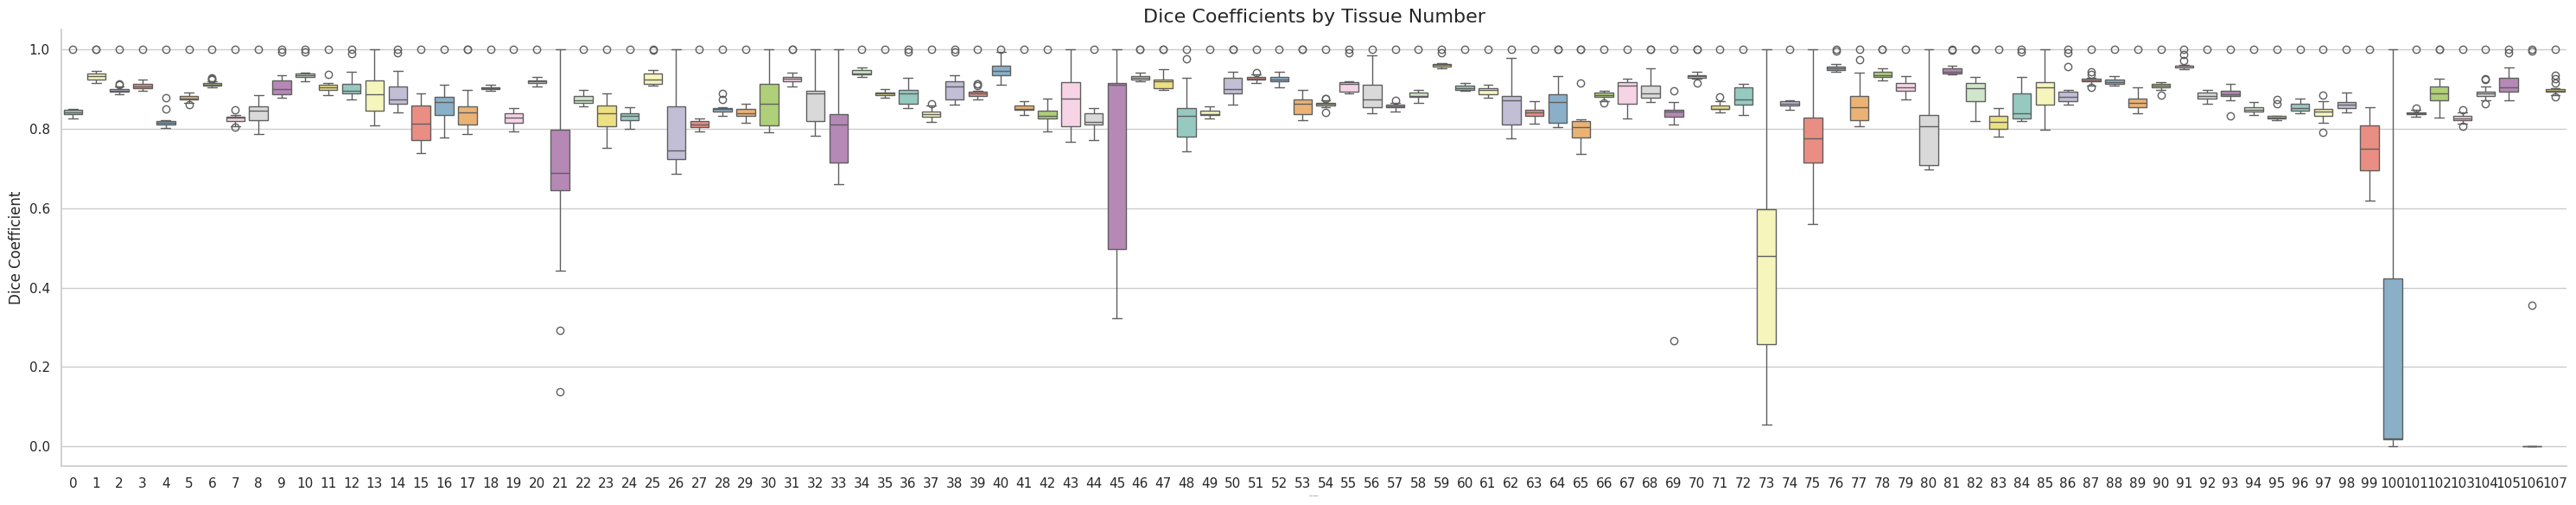

In [22]:
sns.set(style="whitegrid")

# Create a figure and axes with larger size
fig, ax = plt.subplots(figsize=(30, 6))

# Customize the boxplot
sns.boxplot(x='Tissue_Number', y='Dice', data=tissue_dice_df, ax=ax, palette="Set3")

# Set the title and labels
ax.set_title('Dice Coefficients by Tissue Number', fontsize=16)
ax.set_xlabel('Tissue Number', fontsize=12)
ax.set_ylabel('Dice Coefficient', fontsize=12)

# Rotate the x-axis labels for better readability


# Decrease the x-axis label size
ax.xaxis.label.set_size(1)

# Add grid lines for the y-axis
ax.yaxis.grid(True)

# Remove the top and right spines
sns.despine()

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [55]:
i=1
counts=[]
group_names = []
current_group_name = None
for file_name in data['file_name']:
    if 'ROUND_00' in file_name:
        counts.append(i)
        group_names.append(current_group_name)
        current_group_name = file_name
        i=1
    else:
        i+=1
# Append the last group
counts.append(i)
group_names.append(current_group_name)

dice_scores = data['dice'].tolist()
start = 0
grouped_dice_scores = []
for count in counts[1:]:
    # Get the dice scores for the current group
    grouped_dice_scores.append(dice_scores[start:start+count])
    # Update the start index for the next group
    start += count

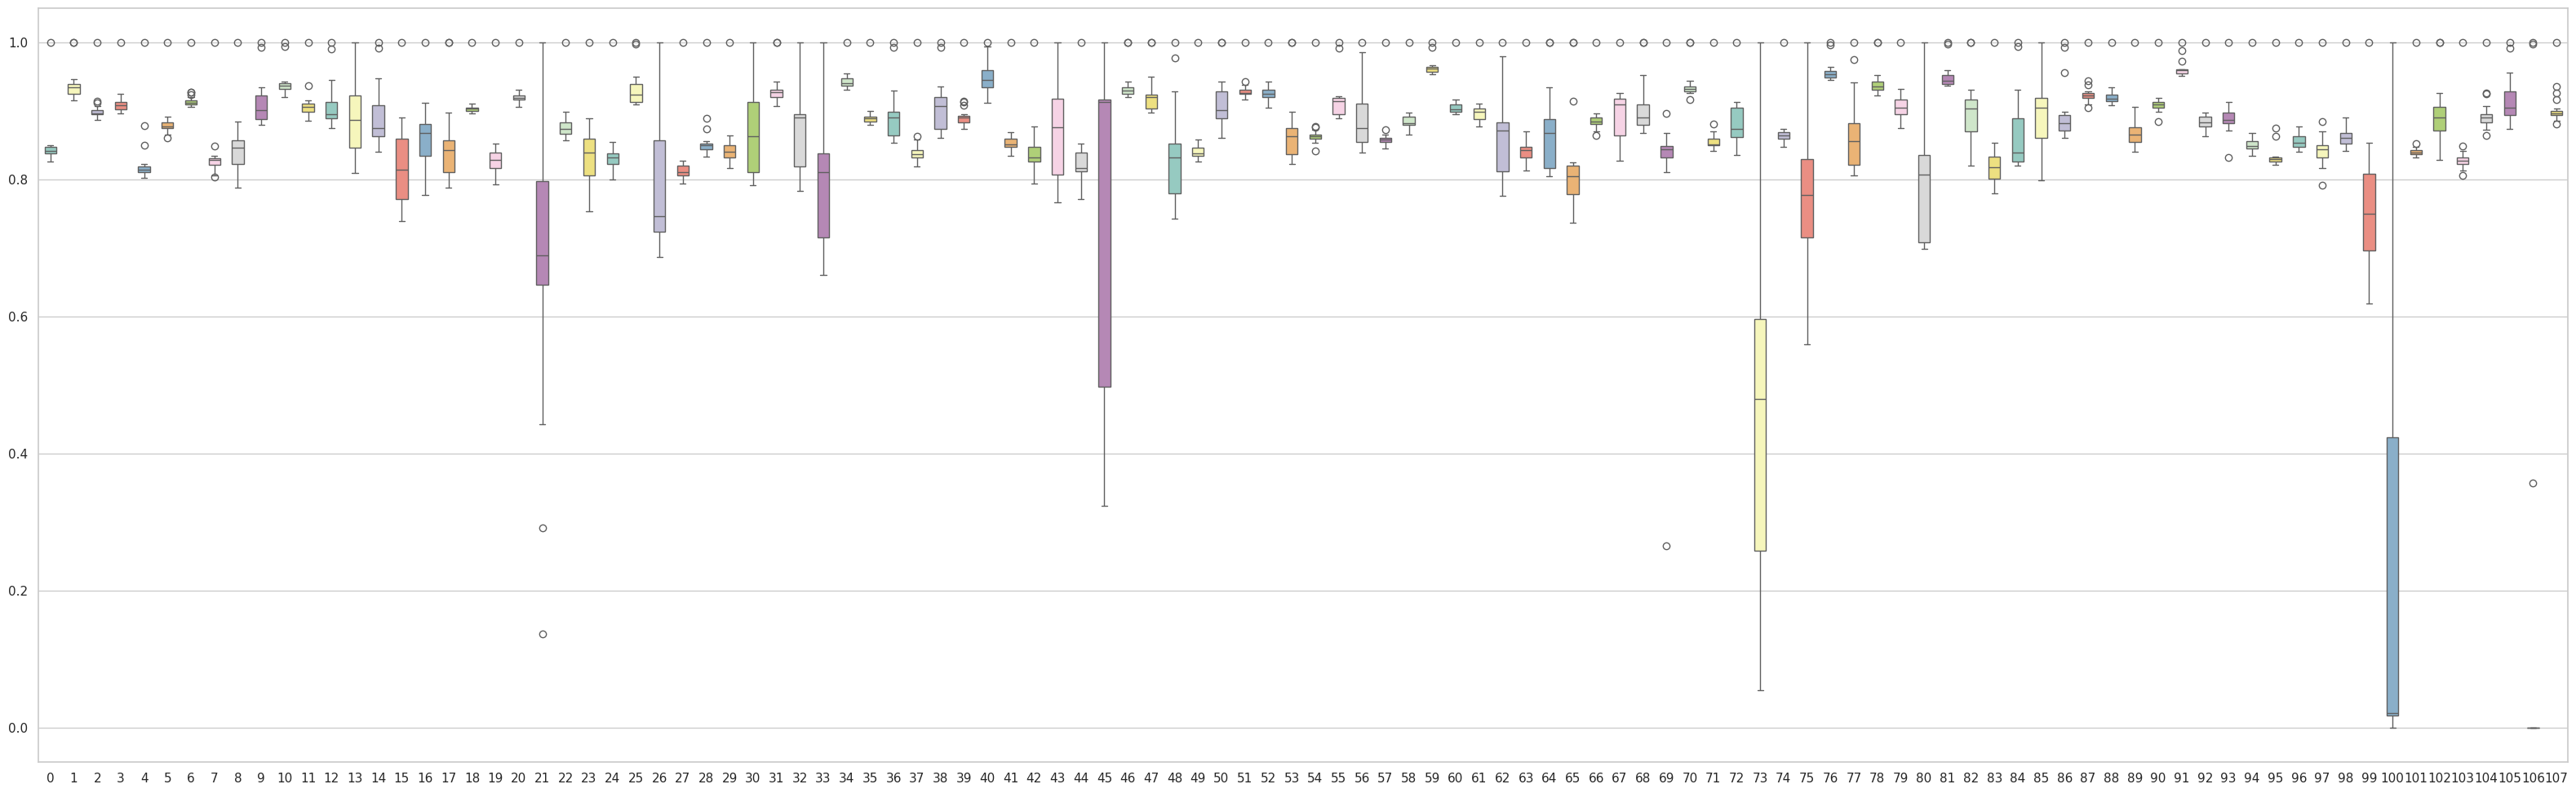

In [56]:

plt.figure(figsize=(40,12))
# Create a box plot for each group
sns.boxplot(data=grouped_dice_scores, palette="Set3", width=0.5)

ax.set_title('Grouped Dice Scores')
ax.set_xlabel('Group')
ax.set_ylabel('Dice Score')

# Display the plot
plt.show()

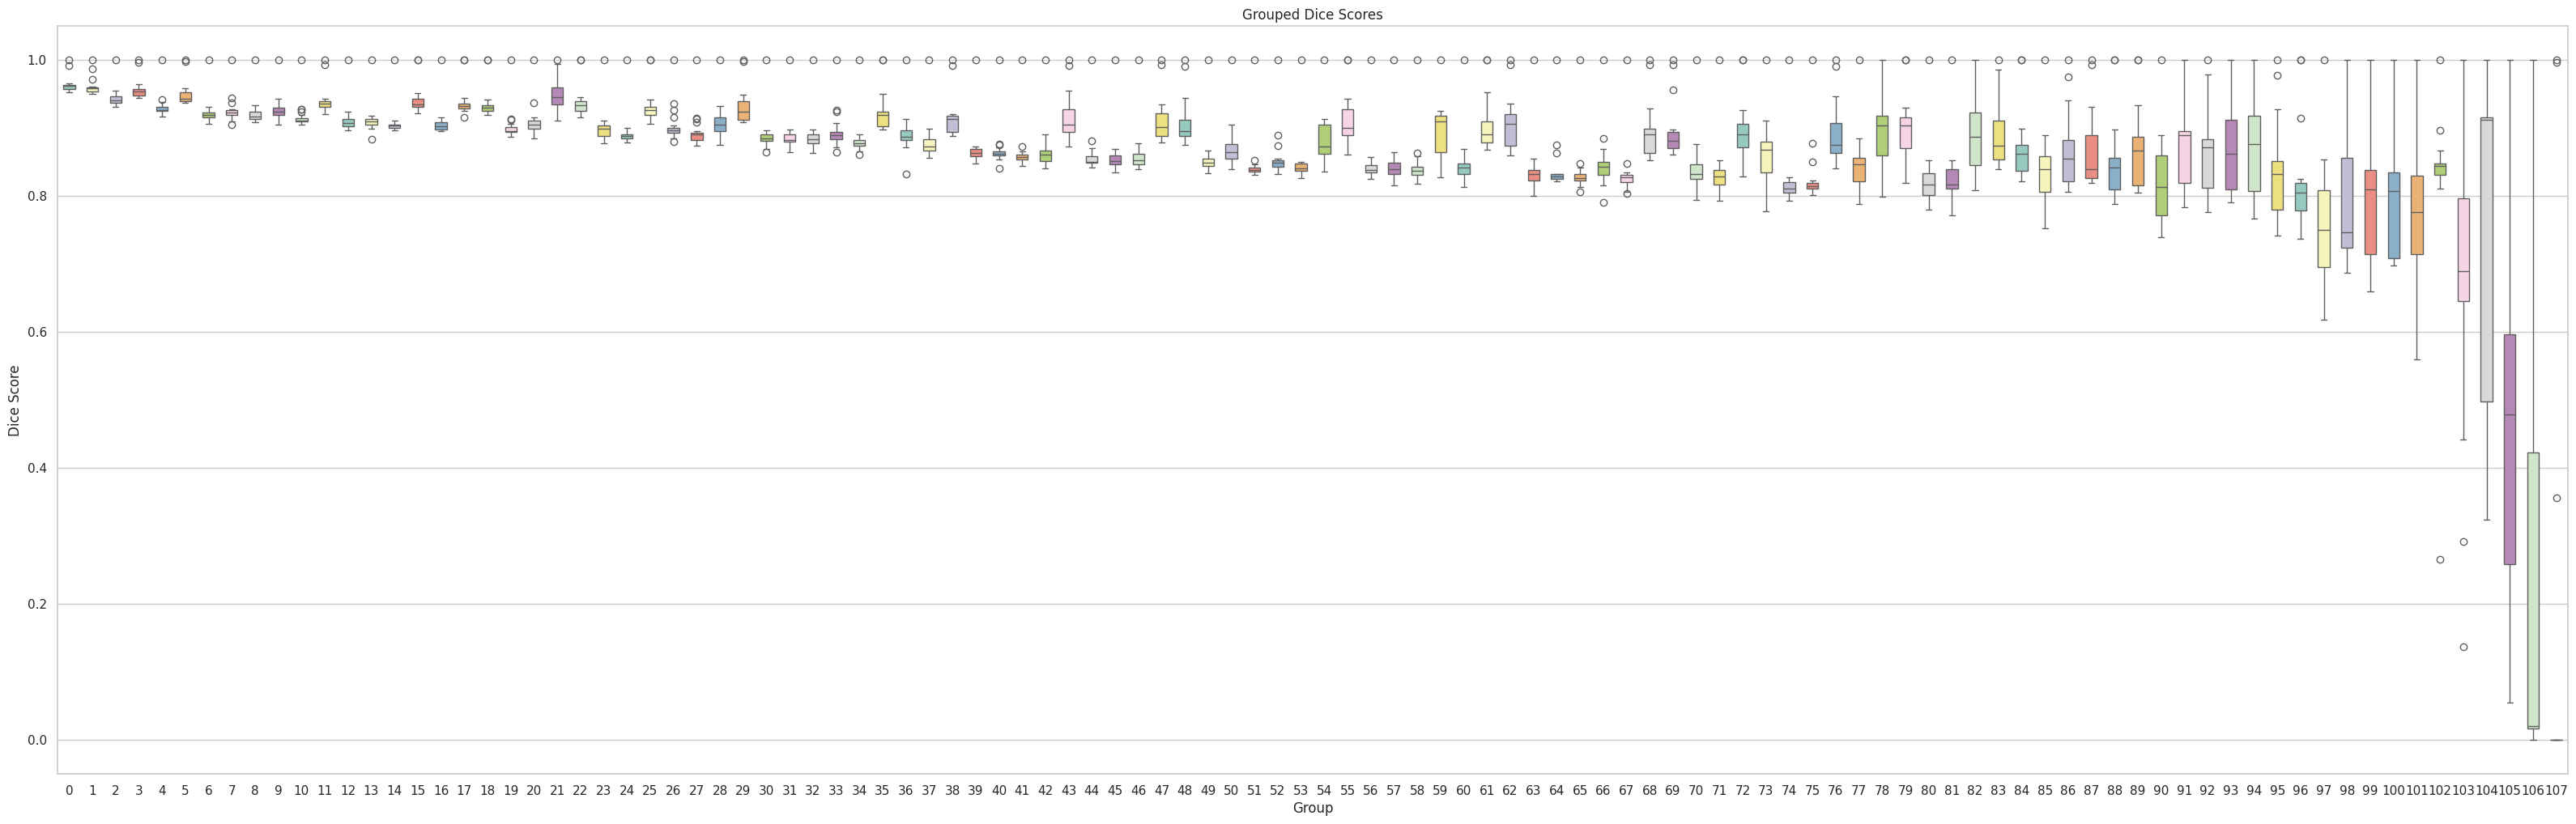

In [111]:
import numpy as np

i=1
counts=[]
group_names = []
current_group_name = None
for file_name in data['file_name']:
    if 'ROUND_00' in file_name:
        counts.append(i)
        group_names.append(current_group_name)
        current_group_name = file_name
        i=1
    else:
        i+=1
# Append the last group
counts.append(i)
group_names.append(current_group_name)

dice_scores = data['dice'].tolist()
start = 0
grouped_dice_scores = []
for count in counts[1:]:
    # Get the dice scores for the current group
    grouped_dice_scores.append(dice_scores[start:start+count])
    # Update the start index for the next group
    start += count

# Calculate the variance of each group
variances = [np.var(group) for group in grouped_dice_scores]

# Combine the group names, variances, and scores into a list of tuples
groups_and_scores = list(zip(group_names, variances, grouped_dice_scores))

# Sort the list of tuples based on the variance values
groups_and_scores.sort(key=lambda x: x[1])

# Unzip the sorted list of tuples
sorted_group_names, _, sorted_dice_scores = zip(*groups_and_scores)

plt.figure(figsize=(40,12))
# Create a box plot for each group
sns.boxplot(data=sorted_dice_scores, palette="Set3", width=0.5)

plt.title('Grouped Dice Scores')
plt.xlabel('Group')
plt.ylabel('Dice Score')

# Display the plot
plt.show()

In [69]:
# Iterate over the grouped_dice_scores
for i, group in enumerate(grouped_dice_scores):
    # Check if any value in the group is less than 0.8
    if any(score < 0.8 for score in group):
        # If such a value is found, print the corresponding group name
        print(group_names[i])

GCA033ACB_TISSUE02_DAPI_DAPI_12ms_ROUND_00_initial_reg.tif
GCA112TIA_DAPI_DAPI_30ms_ROUND_00_initial_reg.tif
GCA132TIA_TISSUE01_DAPI_DAPI_30ms_ROUND_00_initial_reg.tif
GCA077TIA_DAPI_DAPI_12ms_ROUND_00_initial_reg.tif
GCA022ACB_TISSUE01_DAPI_DAPI_12ms_ROUND_00_initial_reg.tif
GCA035ACB_TISSUE01_DAPI_DAPI_12ms_ROUND_00_initial_reg.tif
GCA053TIA_TISSUE02_DAPI_DAPI_30ms_ROUND_00_initial_reg.tif
GCA069TIB_TISSUE02_DAPI_DAPI_12ms_ROUND_00_initial_reg.tif
GCA045TIB_TISSUE01_DAPI_DAPI_12ms_ROUND_00_initial_reg.tif
GCA075TIB_TISSUE01_DAPI_DAPI_12ms_ROUND_00_initial_reg.tif
GCA066ACB_TISSUE02_DAPI_DAPI_12ms_ROUND_00_initial_reg.tif
GCA081TIB_TISSUE01_DAPI_DAPI_12ms_ROUND_00_initial_reg.tif
GCA039ACB_TISSUE01_DAPI_DAPI_12ms_ROUND_00_initial_reg.tif
GCA062ACA_TISSUE01_DAPI_DAPI_12ms_ROUND_00_initial_reg.tif
GCA020ACB_TISSUE03_DAPI_DAPI_12ms_ROUND_00_initial_reg.tif
GCA094ACA_TISSUE02_DAPI_DAPI_30ms_ROUND_00_initial_reg.tif
GCA066TIB_TISSUE01_DAPI_DAPI_12ms_ROUND_00_initial_reg.tif
GCA066ACB_TISSU

Text(0.5, 0, 'Dice Score')

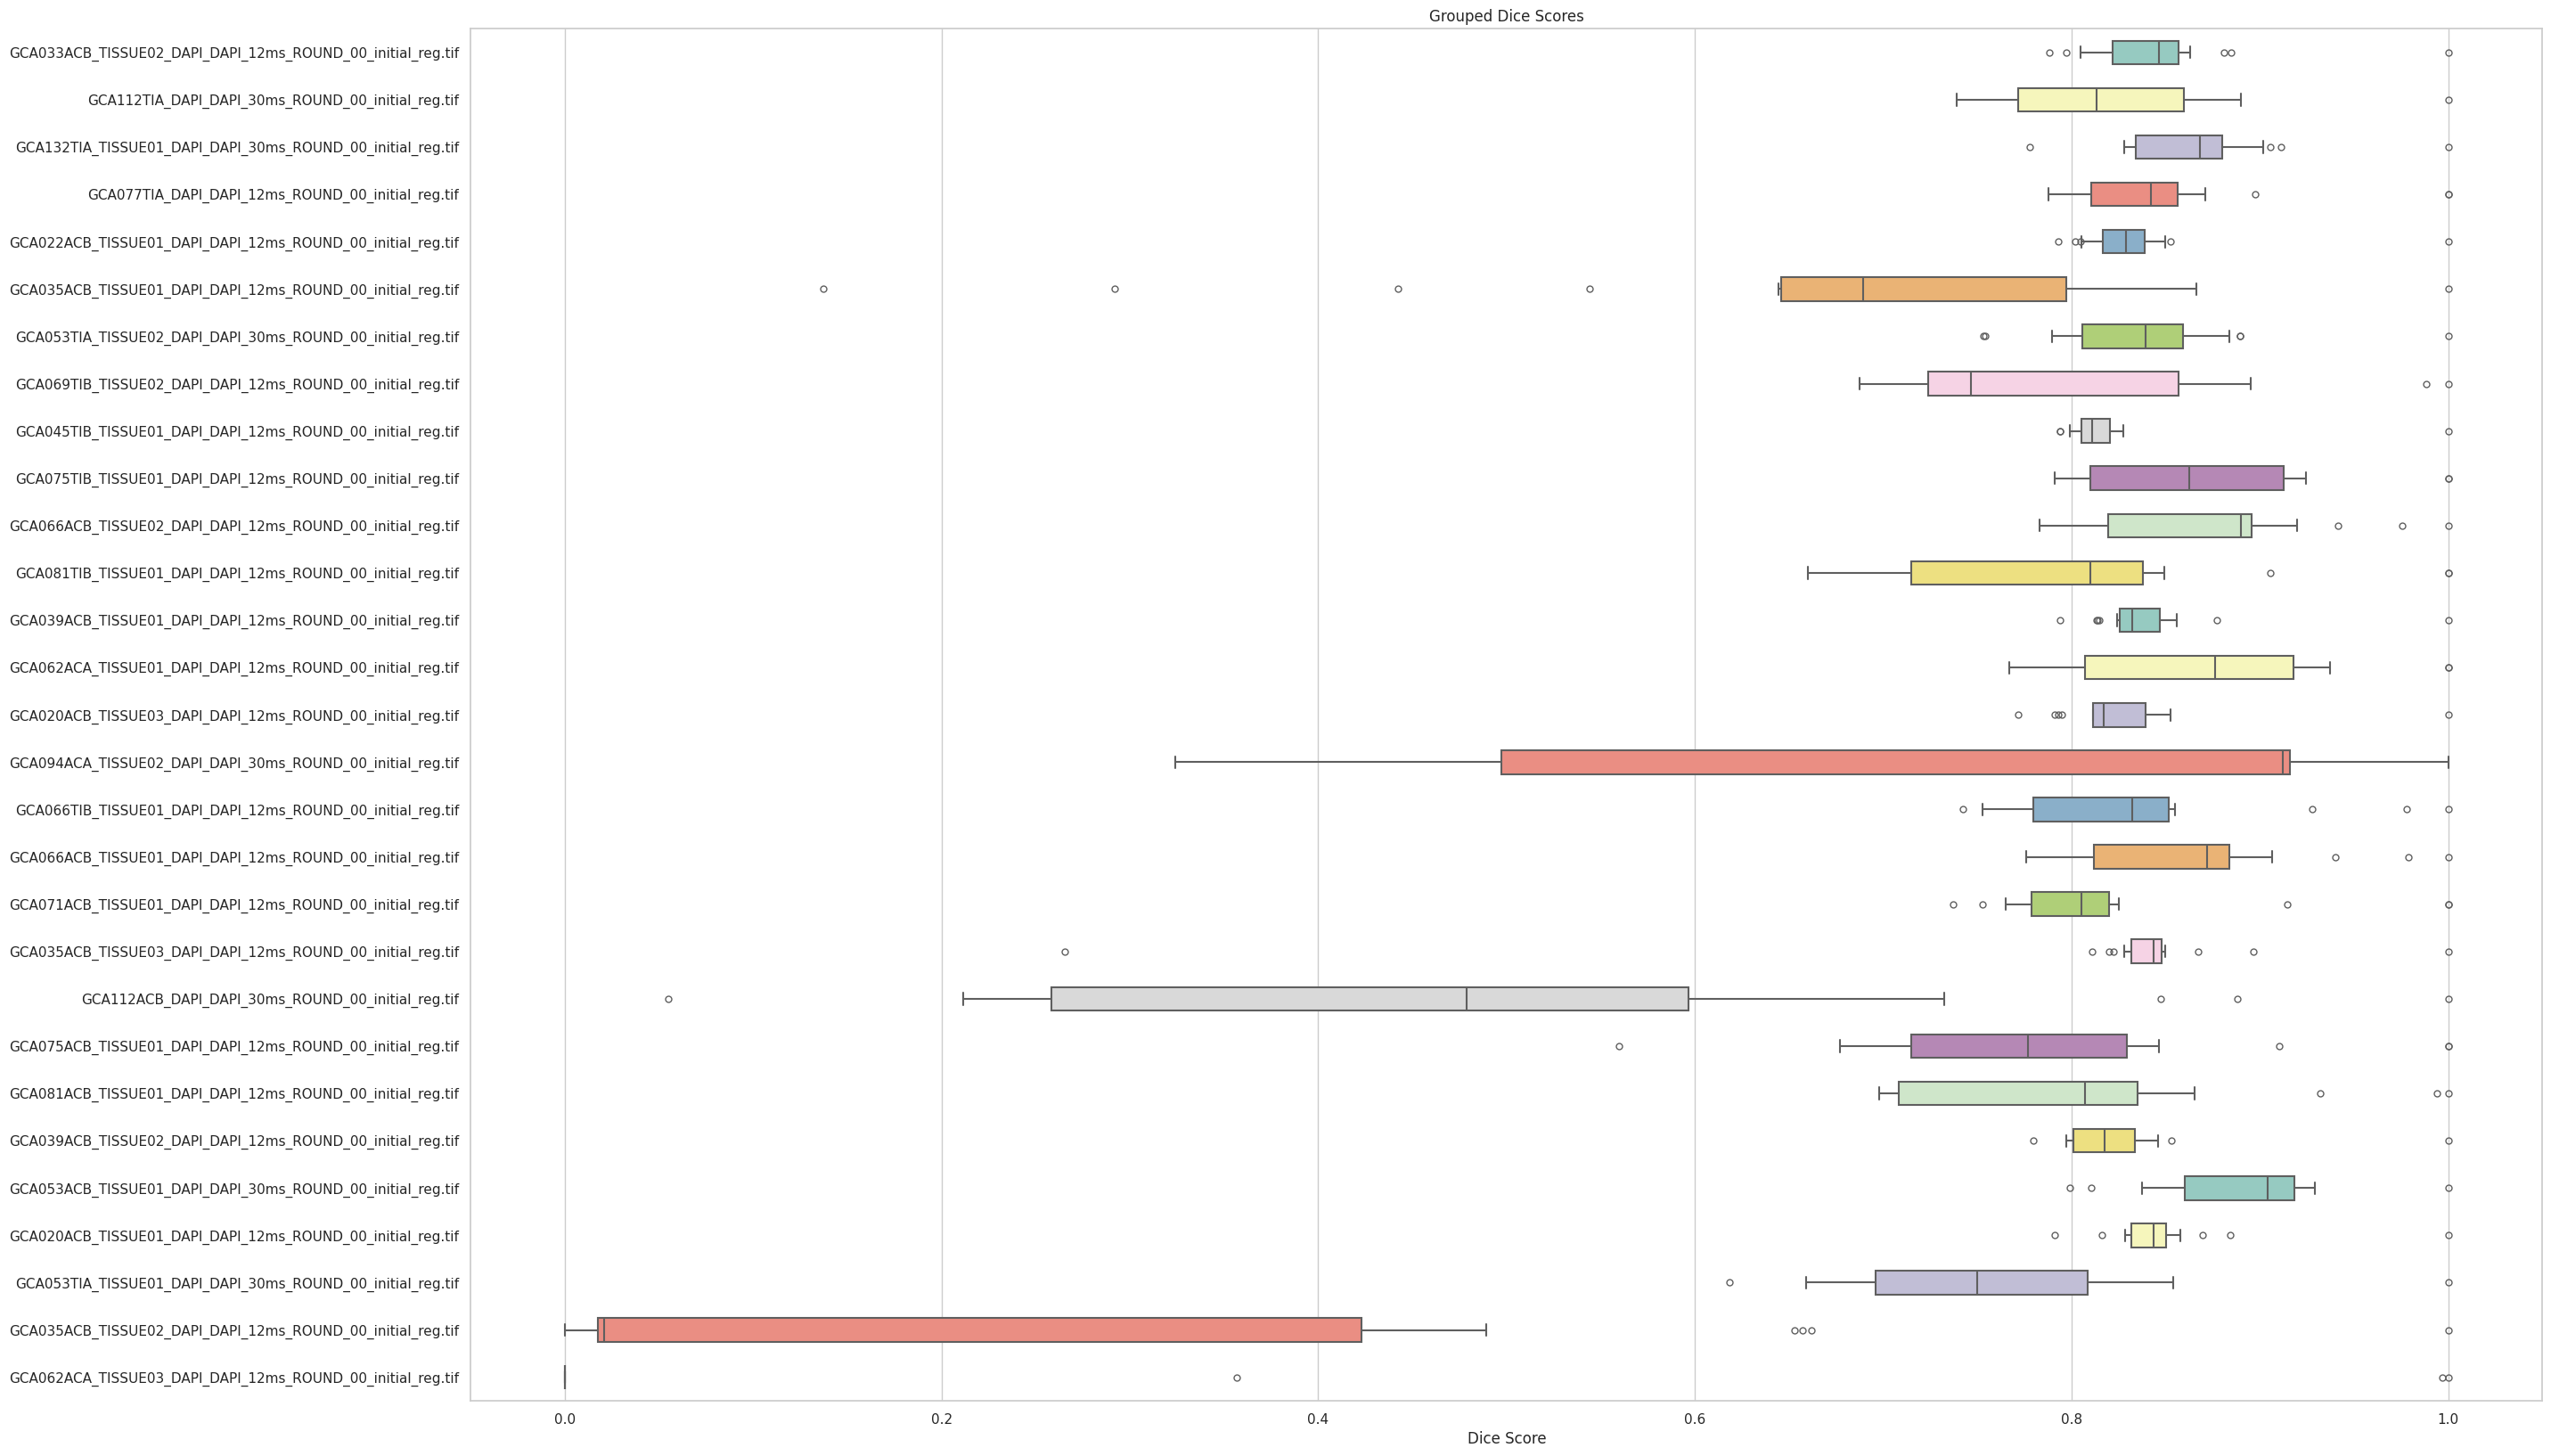

In [86]:
filtered_dice_scores = [group for group in grouped_dice_scores if any(score < 0.8 for score in group)]
filtered_group_names = [group_names[i] for i, group in enumerate(grouped_dice_scores) if any(score < 0.8 for score in group)]

# Create a new figure with a larger width
plt.figure(figsize=(30, 20))

# Create a box plot for each group with a larger box width and switch the x and y axes
sns.boxplot(data=filtered_dice_scores, palette="Set3", width=0.5, orient="h", linewidth=1.5, fliersize=5, whis=0.5)

# Set the y-tick labels to the group names
plt.yticks(range(len(filtered_group_names)), filtered_group_names)

plt.title('Grouped Dice Scores')
plt.xlabel('Dice Score')


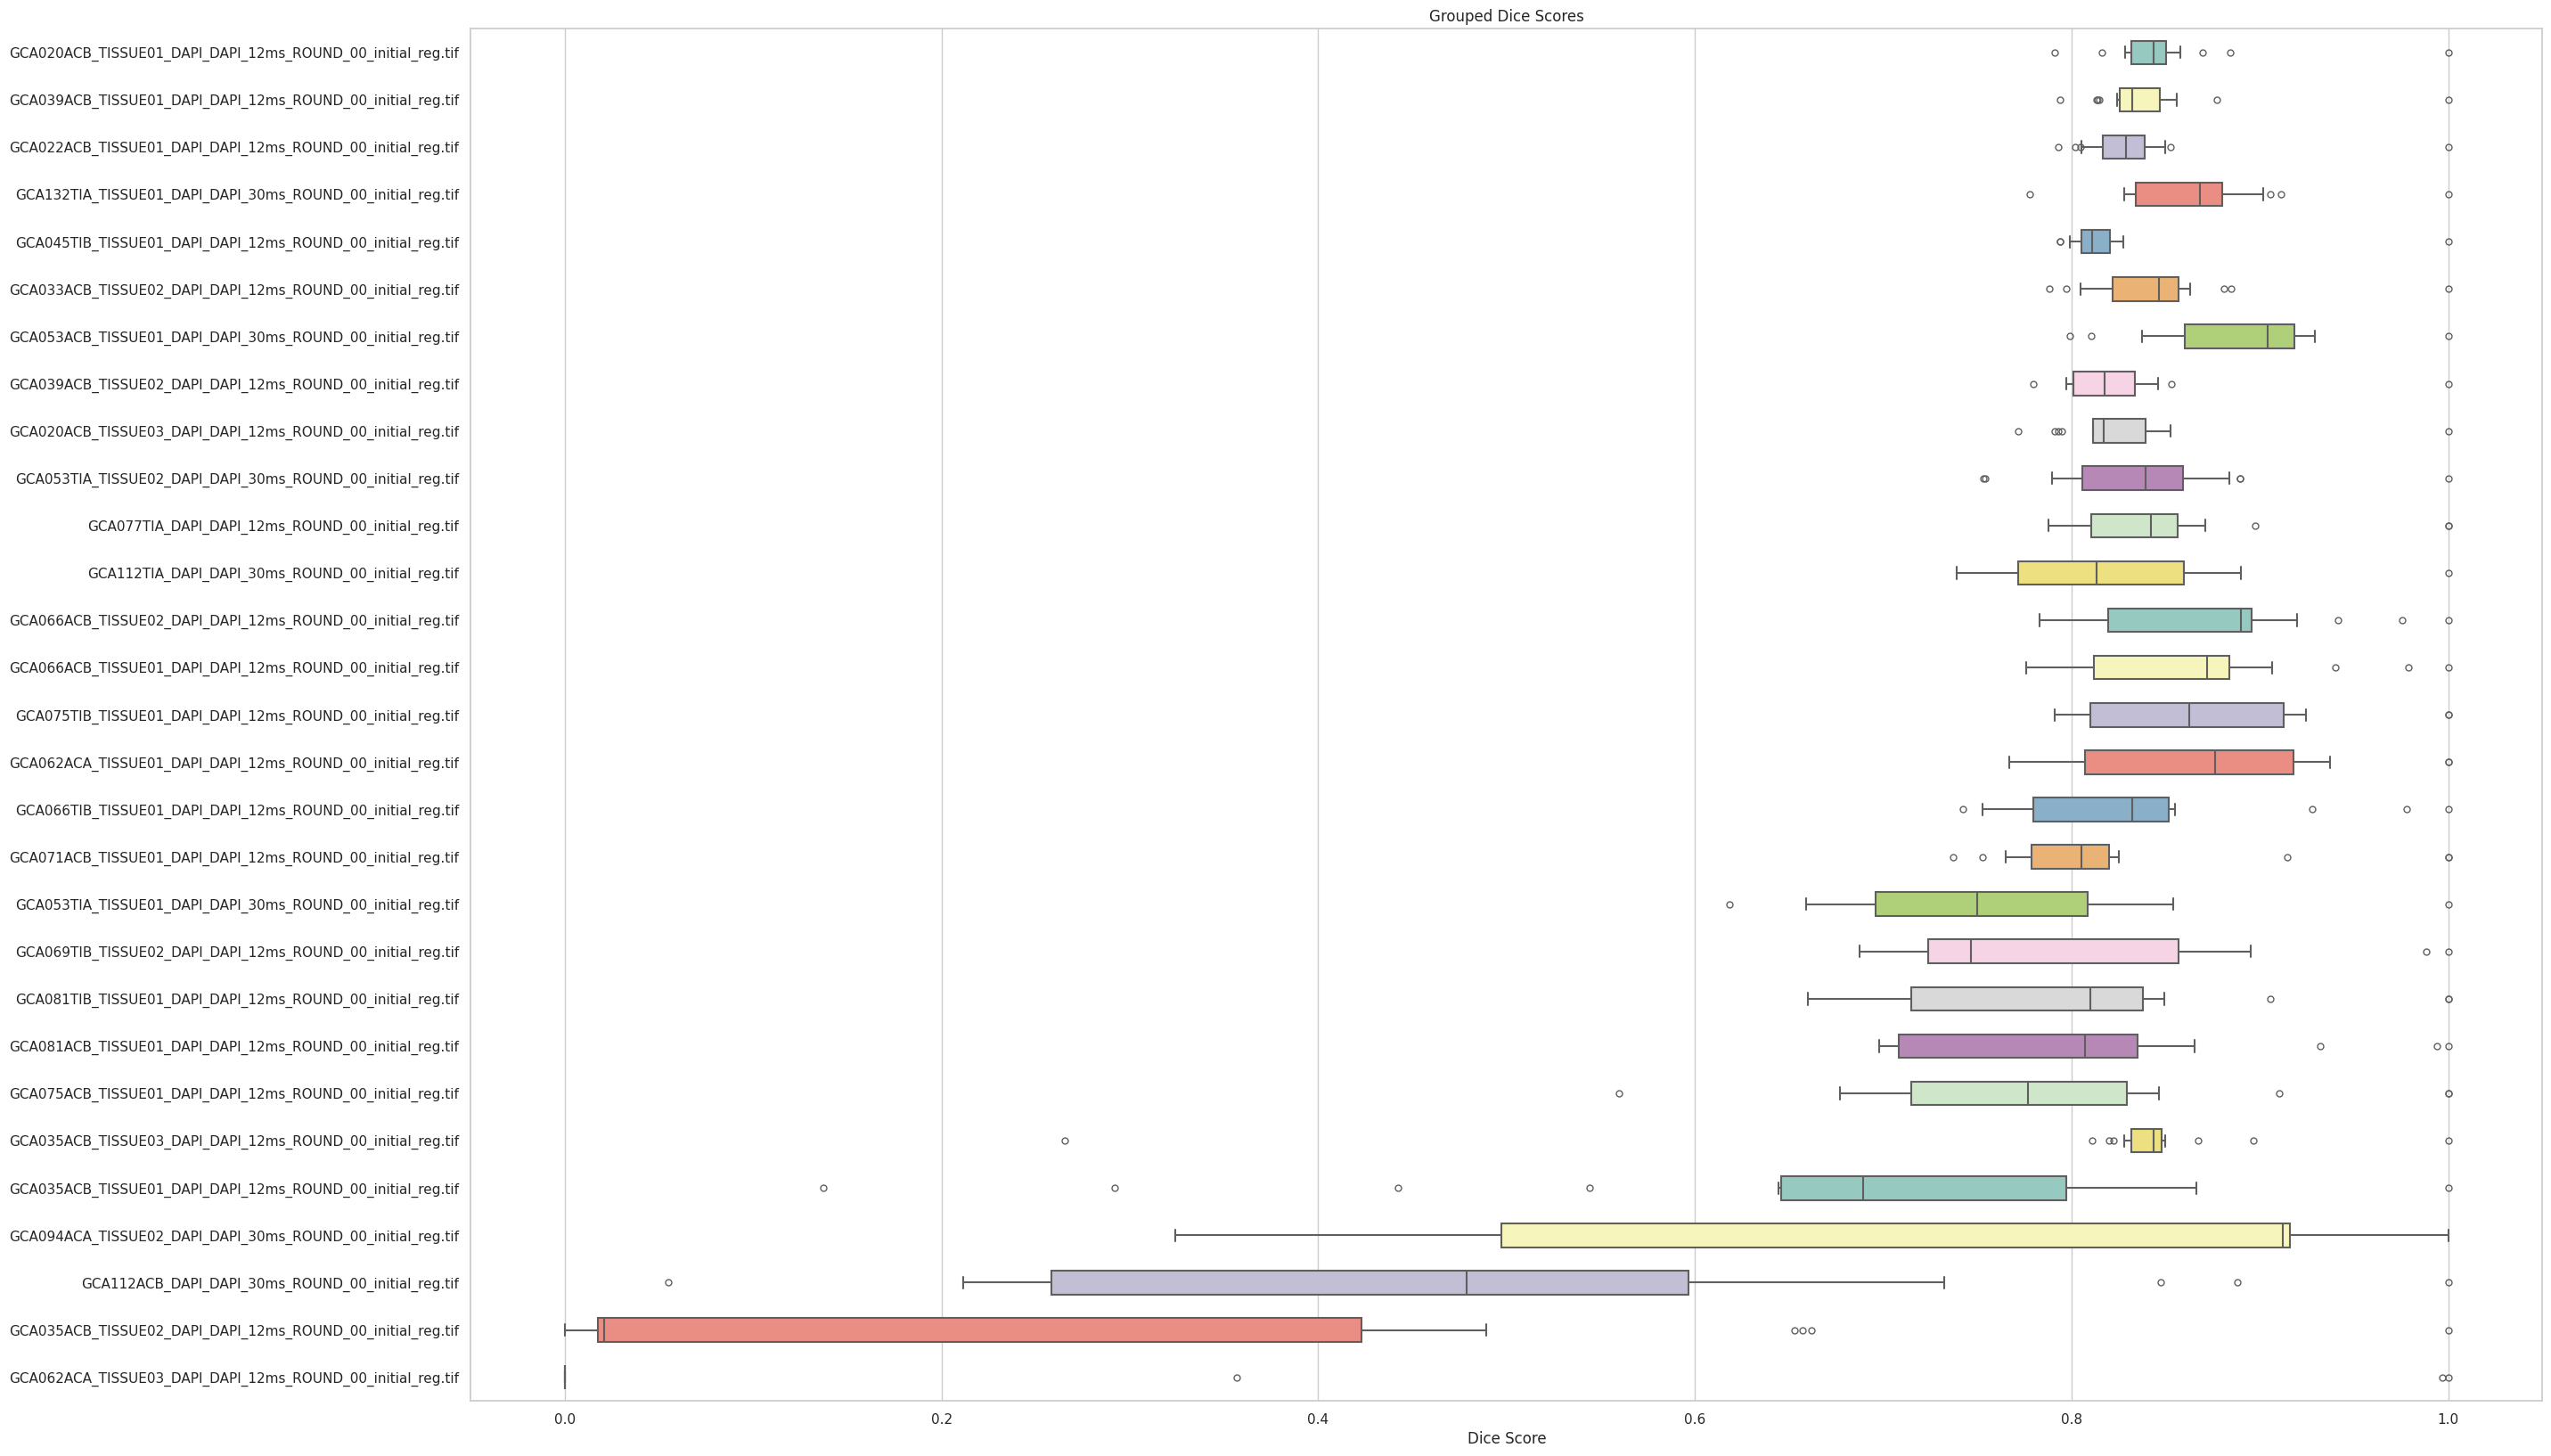

In [110]:
# Calculate the variance of each group
variances = [np.var(group) for group in filtered_dice_scores]

# Combine the group names, variances, and scores into a list of tuples
groups_and_scores = list(zip(filtered_group_names, variances, filtered_dice_scores))

# Sort the list of tuples based on the variance values
groups_and_scores.sort(key=lambda x: x[1])

# Unzip the sorted list of tuples
sorted_group_names, _, sorted_dice_scores = zip(*groups_and_scores)

# Create a new figure with a larger width
plt.figure(figsize=(30, 20))

# Create a box plot for each group with a larger box width and switch the x and y axes
sns.boxplot(data=sorted_dice_scores, palette="Set3", width=0.5, orient="h", linewidth=1.5, fliersize=5, whis=0.5)

# Set the y-tick labels to the sorted group names
plt.yticks(range(len(sorted_group_names)), sorted_group_names)

plt.title('Grouped Dice Scores')
plt.xlabel('Dice Score')

# Display the plot
plt.show()

In [103]:
new_group_names=[]
for i, group in enumerate(grouped_dice_scores):
    # Check if any value in the group is less than 0.8
    if any(score < 0.8 for score in group):
        # If such a value is found, print the corresponding group name
        new_group_names.append(group_names[i].split('_')[0])

In [104]:
len(new_group_names)

29

In [105]:
#Remove duplicates from new_group_names
new_group_names = list(set(new_group_names))
len(new_group_names)

22

In [98]:
from collections import Counter

# Count the occurrences of each element
counter = Counter(new_group_names)

# Find the elements that occur more than once
duplicates = [item for item, count in counter.items() if count > 1]

# Print the duplicates
print(duplicates)

['GCA035ACB', 'GCA053TIA', 'GCA066ACB', 'GCA039ACB', 'GCA062ACA', 'GCA020ACB']


In [100]:
from scipy.stats import ttest_rel

orig = [1.0,0.89,0.84,0.89,0.86,0.86,0.87,0.85,0.86,0.84,0.76,0.74,0.76,0.77,0.77,0.77,0.77,0.79,0.79,0.77]
registered = [1.0,0.85,0.82,0.86,0.86,0.86,0.85,0.84,0.85,0.84,0.82,0.82,0.81,0.83,0.81,0.82,0.83,0.83,0.83,0.83]

t_stat, p_val = ttest_rel(orig, registered)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: -2.4929946606229465
P-value: 0.022063702430624155


In [108]:
26/108


0.24074074074074073

***Comparision Plots***

In [128]:
file='/home-local/rudravg/downloads/metrics_version2 - Baselines.csv'
data=pd.read_csv(file)

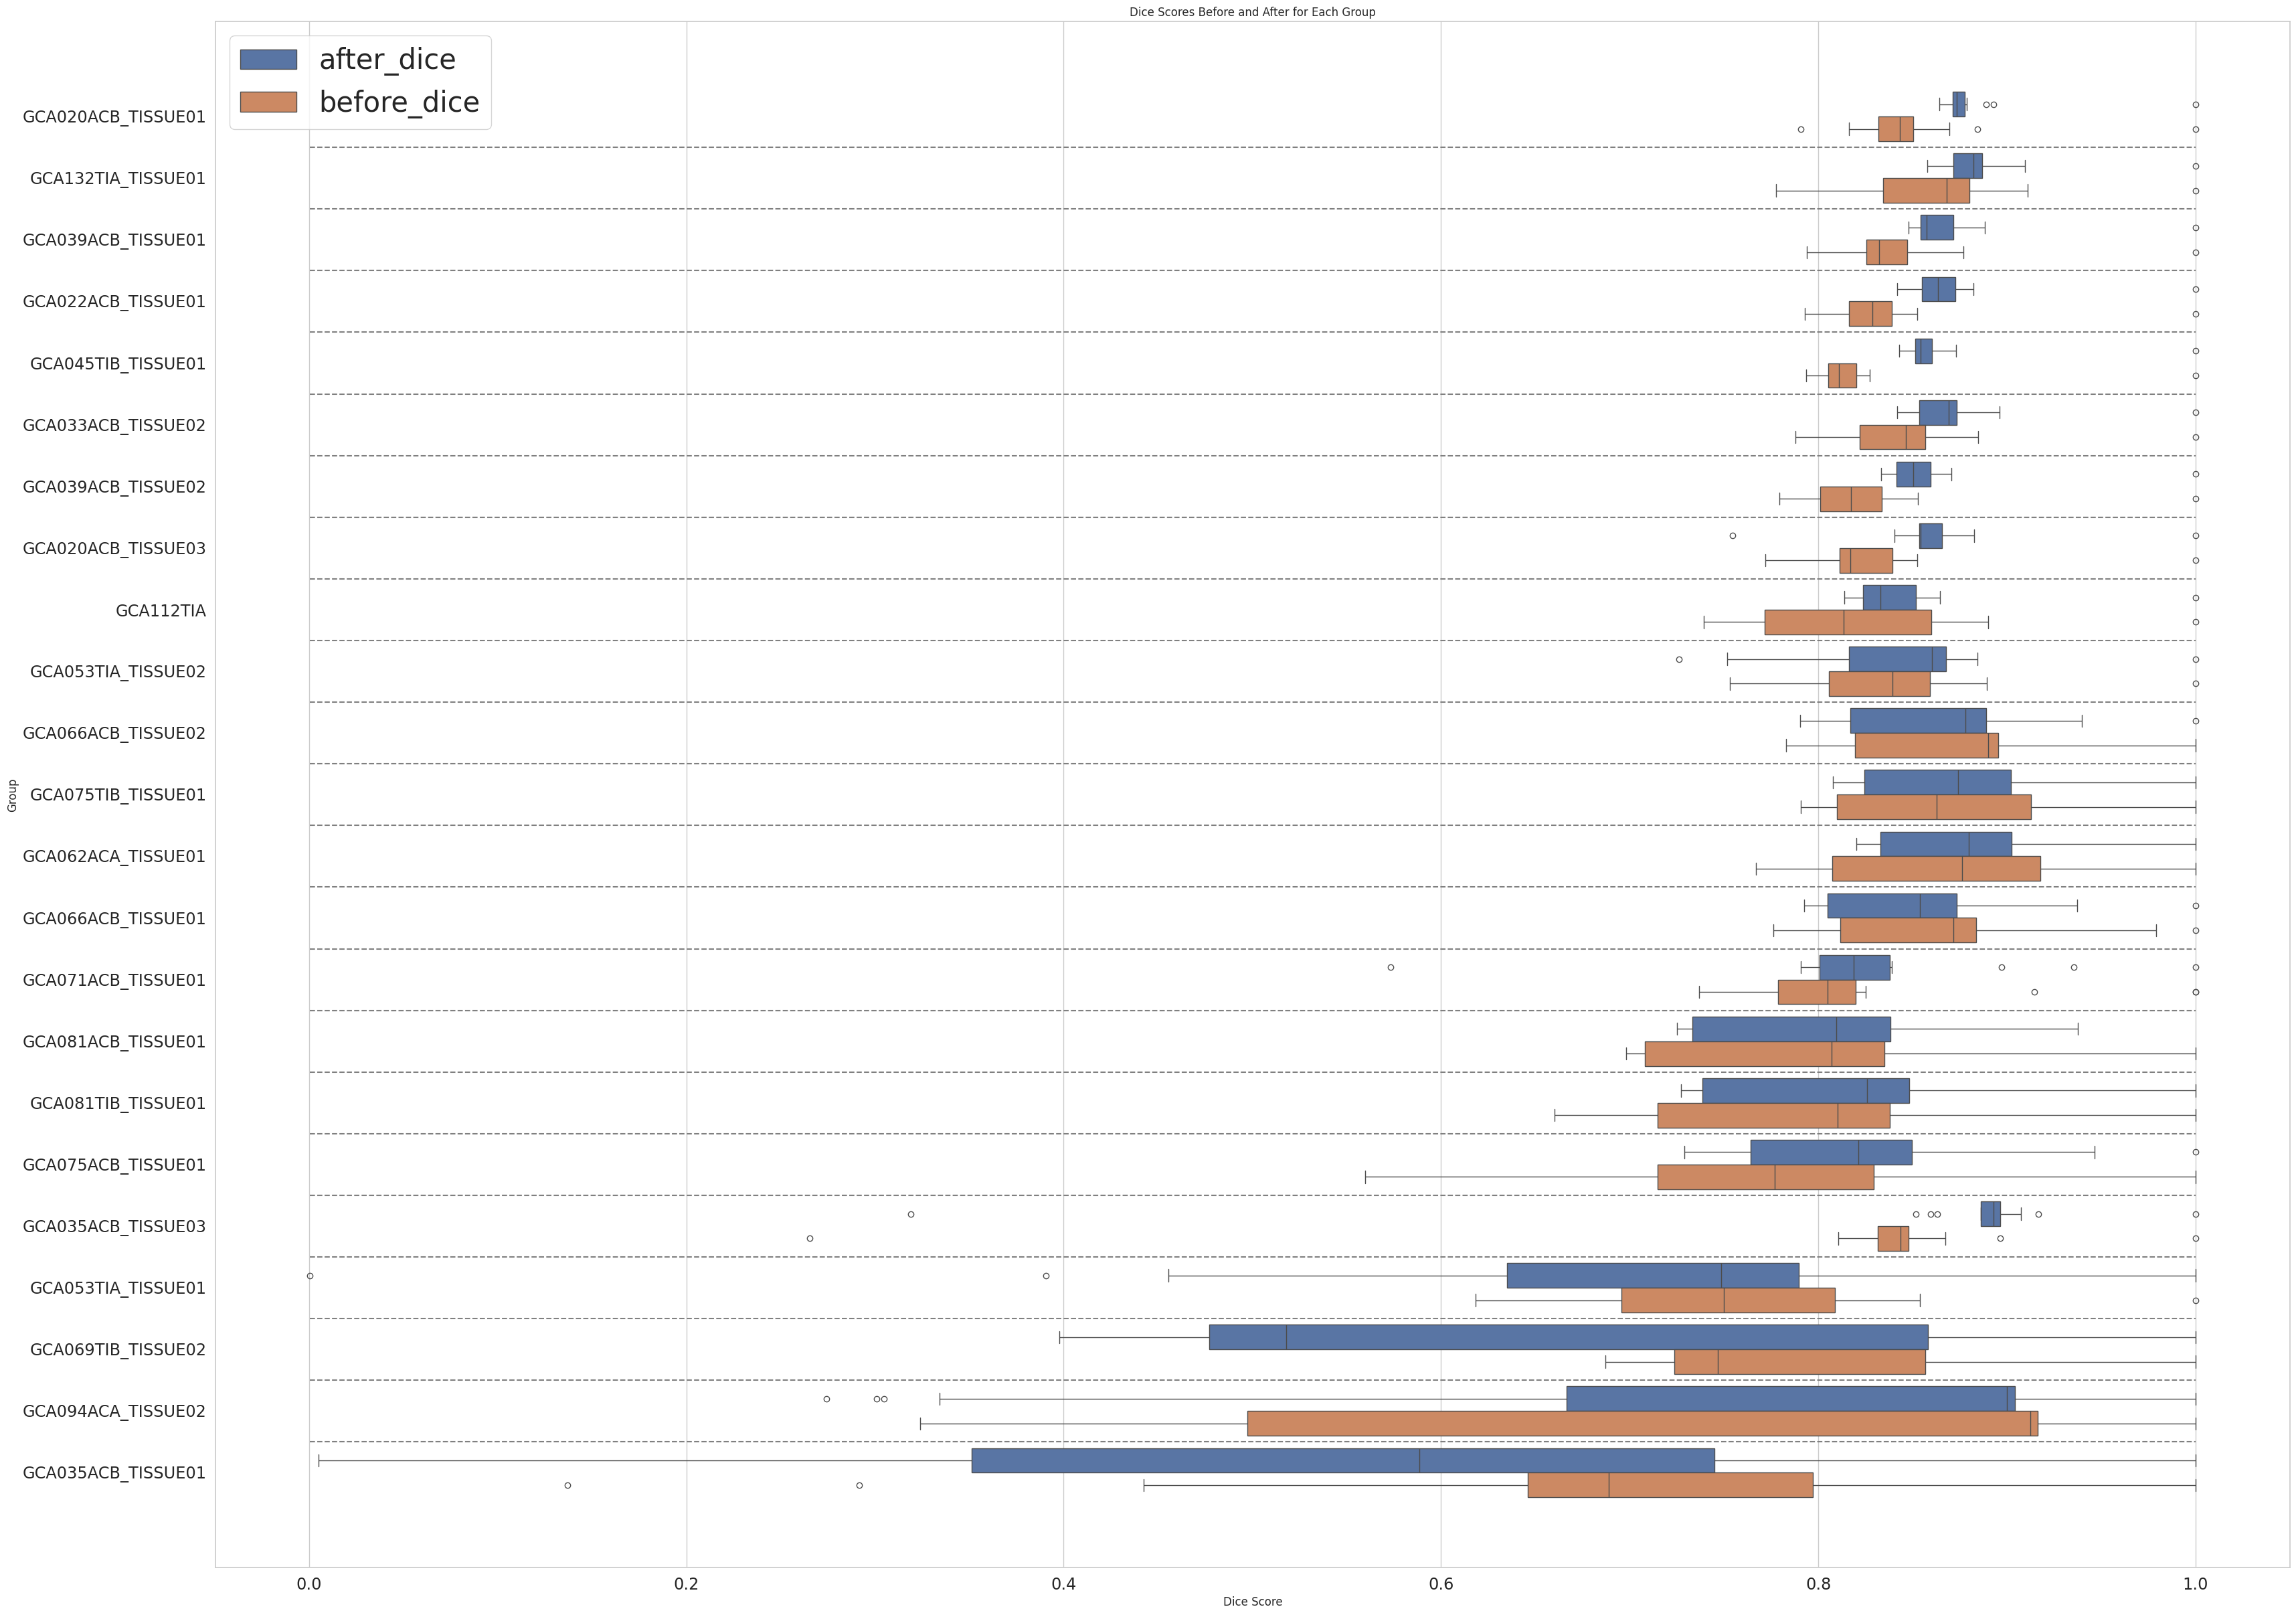

In [131]:
data['group'] = data['file_name'].apply(lambda x: x.split('_DAPI_DAPI')[0])

# Melt the DataFrame to have one row per observation
data['group'] = data['file_name'].apply(lambda x: x.split('_DAPI_DAPI')[0])

# Calculate the variance of each group for 'before_dice' and 'after_dice'
group_variances = data.groupby('group')[['before_dice', 'after_dice']].var()

# Create a new column 'total_variance' which is the sum of variances of 'before_dice' and 'after_dice'
group_variances['total_variance'] = group_variances.sum(axis=1)

# Sort the DataFrame by 'total_variance'
group_variances = group_variances.sort_values('total_variance')

# Reset the index of the DataFrame
group_variances.reset_index(inplace=True)

# Melt the DataFrame to have one row per observation
melted_data = pd.melt(data, id_vars='group', value_vars=['before_dice', 'after_dice'], var_name='time', value_name='dice')

# Merge the melted_data DataFrame with the group_variances DataFrame
melted_data = pd.merge(melted_data, group_variances[['group', 'total_variance']], on='group')

# Sort the DataFrame by 'total_variance'
melted_data = melted_data.sort_values('total_variance')

# Create a box plot for each group
plt.figure(figsize=(40, 30))
sns.boxplot(data=melted_data, y='group', x='dice', hue='time')

# Get the unique group names
groups = melted_data['group'].unique()

# Draw horizontal lines at the boundaries of each group
for i in range(len(groups) - 1):
    plt.hlines(i + 0.5, xmin=melted_data['dice'].min(), xmax=melted_data['dice'].max(), colors='grey', linestyles='dashed')

plt.title('Dice Scores Before and After for Each Group')
plt.ylabel('Group')
plt.xlabel('Dice Score')
plt.yticks(fontsize='x-large')
plt.xticks(fontsize='x-large')

plt.legend(fontsize=30,loc='upper left')

plt.show()

/tmp/ipykernel_1927010/1201313852.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  group_ttest = data.groupby('group').apply(lambda x: stats.ttest_rel(x['before_dice'], x['after_dice']).pvalue)


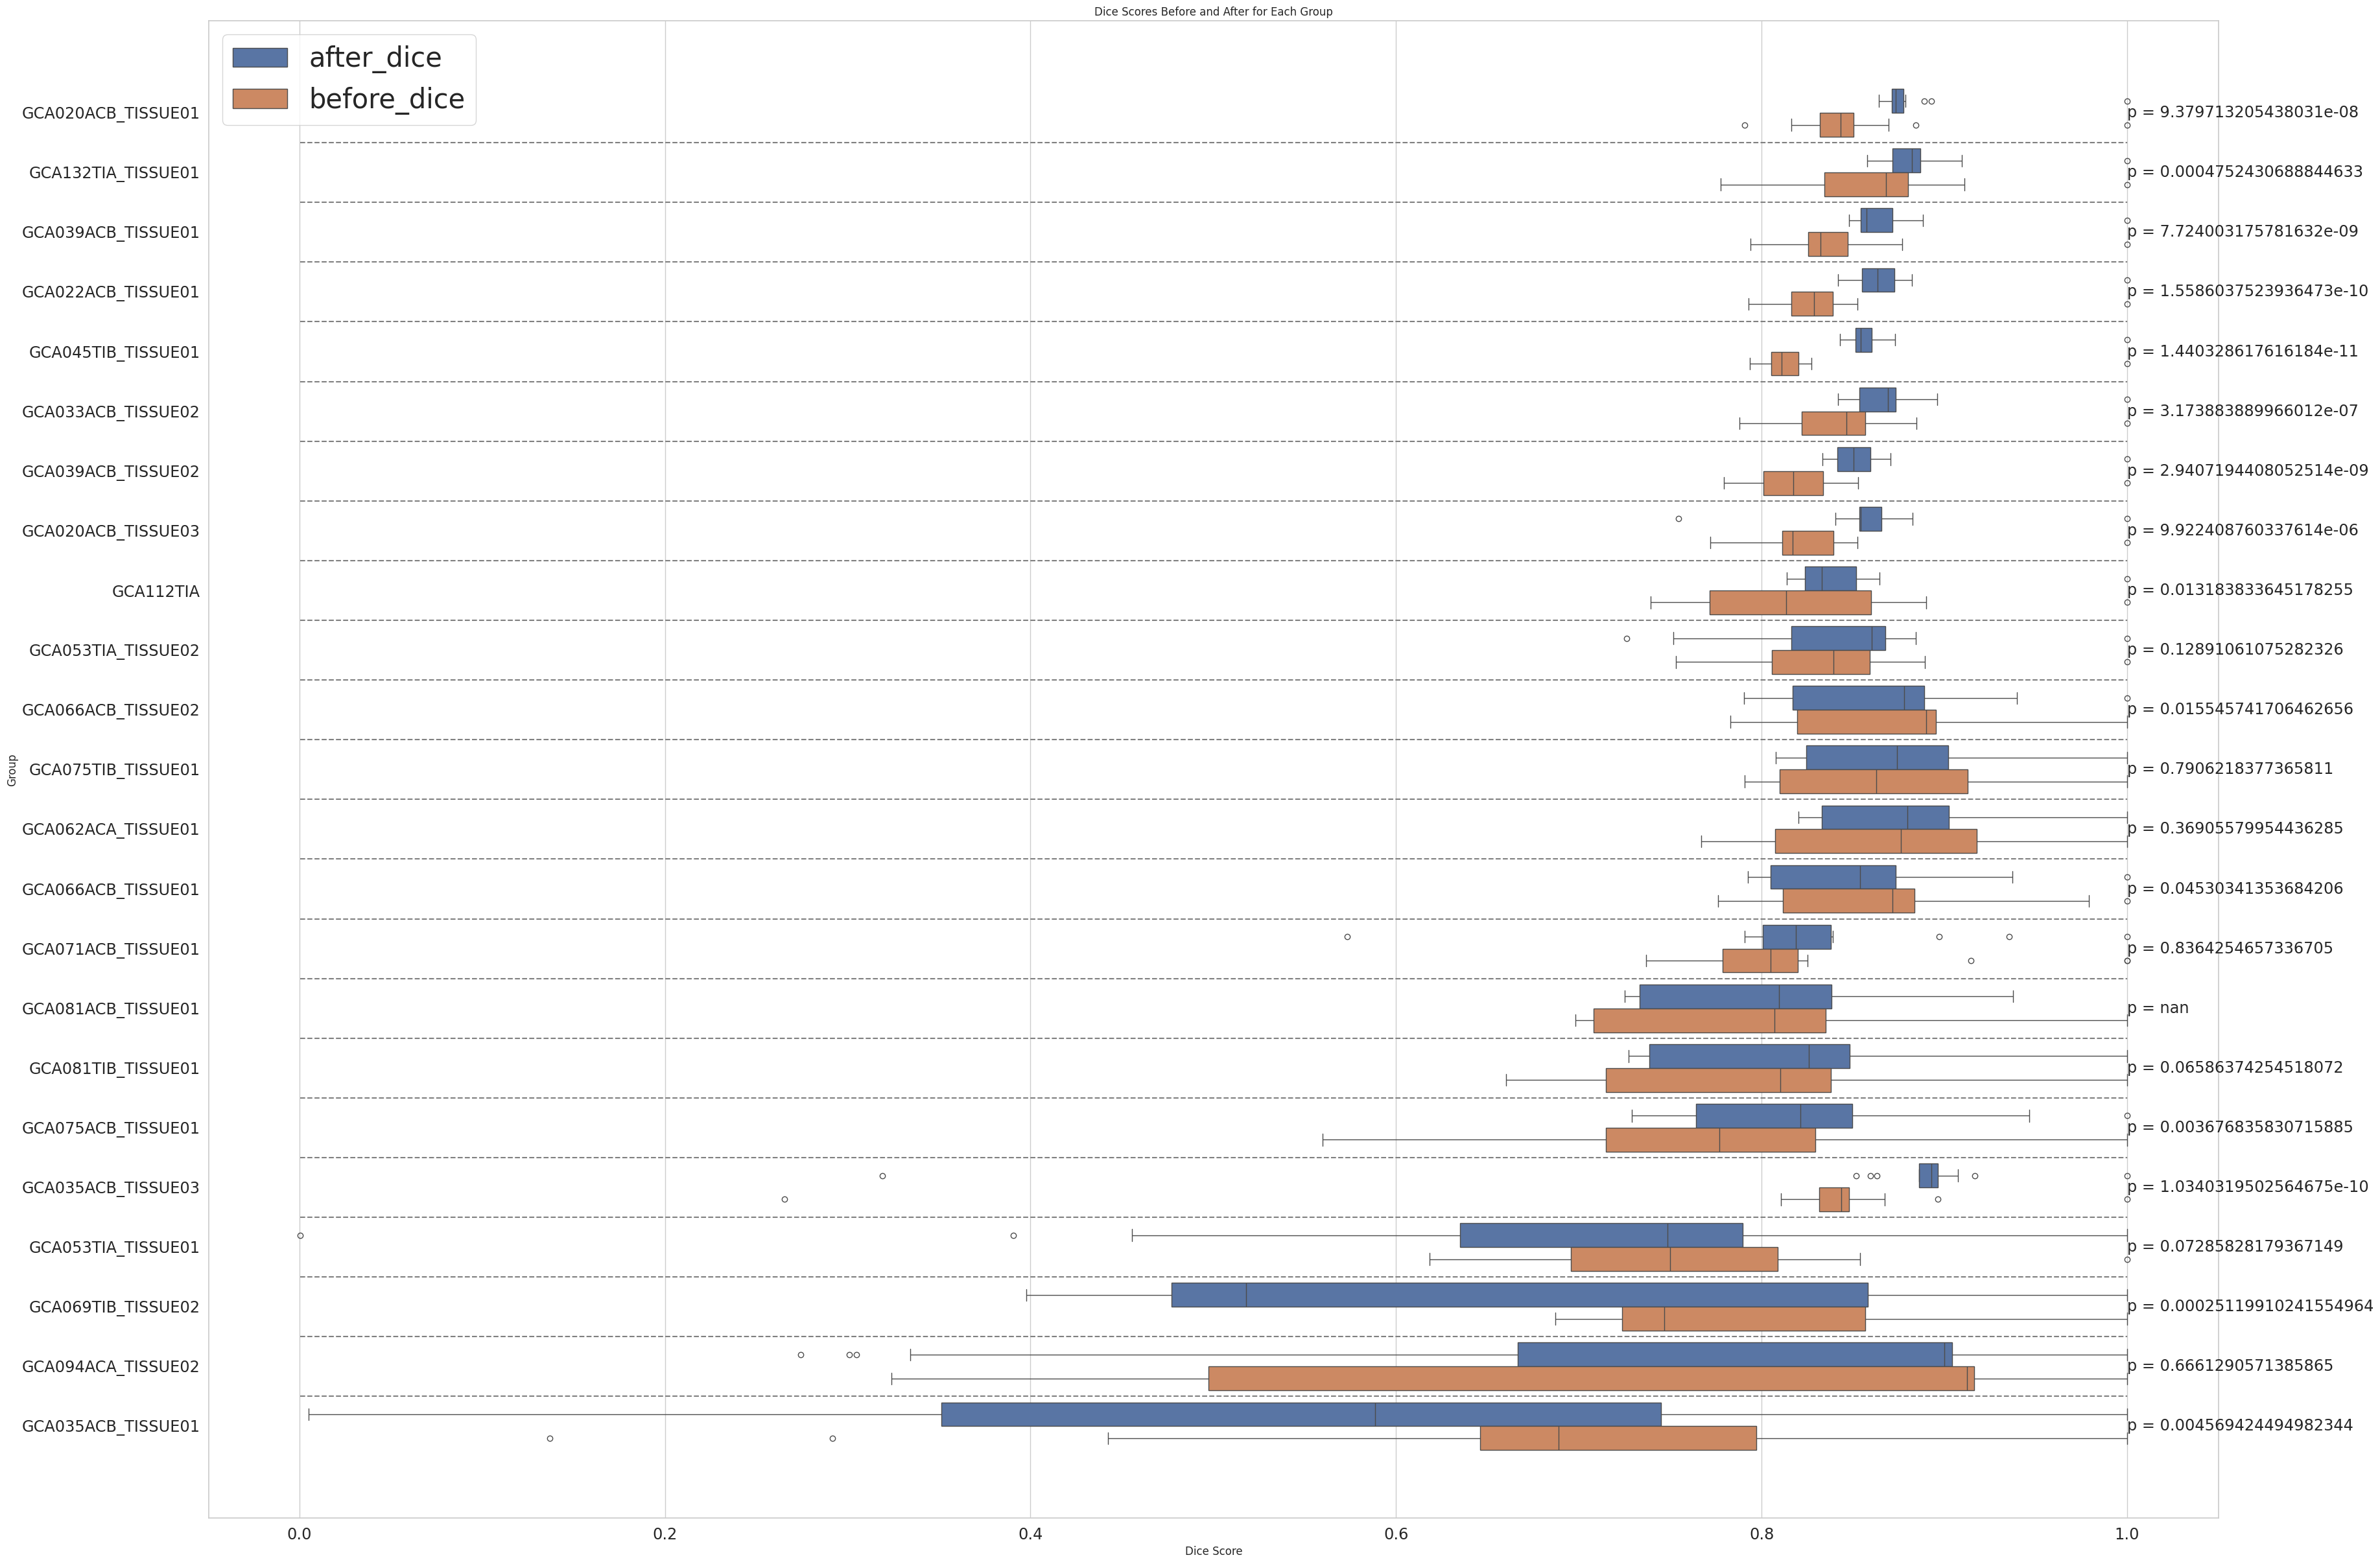

In [133]:
import scipy.stats as stats

# Perform a paired t-test for each group
group_ttest = data.groupby('group').apply(lambda x: stats.ttest_rel(x['before_dice'], x['after_dice']).pvalue)

# Convert the result to a DataFrame and reset the index
group_ttest = group_ttest.to_frame().reset_index()
group_ttest.columns = ['group', 'p_value']

# Merge the melted_data DataFrame with the group_ttest DataFrame
melted_data = pd.merge(melted_data, group_ttest, on='group')

# Create a box plot for each group
plt.figure(figsize=(40, 30))
sns.boxplot(data=melted_data, y='group', x='dice', hue='time')

# Get the unique group names
groups = melted_data['group'].unique()

# Draw horizontal lines at the boundaries of each group
for i in range(len(groups) - 1):
    plt.hlines(i + 0.5, xmin=melted_data['dice'].min(), xmax=melted_data['dice'].max(), colors='grey', linestyles='dashed')

# Show the p-values in the plot
for i, group in enumerate(groups):
    p_value = group_ttest.loc[group_ttest['group'] == group, 'p_value'].values[0]
    plt.text(melted_data['dice'].max(), i, f'p = {p_value}', fontsize='x-large', va='center')

plt.title('Dice Scores Before and After for Each Group')
plt.ylabel('Group')
plt.xlabel('Dice Score')
plt.yticks(fontsize='x-large')
plt.xticks(fontsize='x-large')

plt.legend(fontsize=30,loc='upper left')

plt.show()

In [139]:
#print the 1st and 17th cell in the file_names column
print(data['file_name'][0])
print(data['file_name'][19])

GCA033ACB_TISSUE02_DAPI_DAPI_12ms_ROUND_00_initial_reg.tif
GCA112TIA_DAPI_DAPI_30ms_ROUND_00_initial_reg.tif


In [151]:
before=data['before_dice'][:19]
after=data['after_dice'][:19]
# Perform a paired t-test
t_stat, p_val = stats.ttest_rel(before, after)

In [152]:
p_val

3.173883889966012e-07